<a href="https://colab.research.google.com/github/luegl/keras-cat-vs-other-model/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from tensorflow import keras
from keras import layers, callbacks
import tensorflow as tf
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

In [ ]:
img_size = (180, 180)
img_size_ = 180
BATCH_SIZE = 16

datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [ ]:
train_generator = datagen.flow_from_directory(
    "drive/MyDrive/dataset_cat_no-cat",
    target_size=img_size,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

Found 481 images belonging to 2 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
    "drive/MyDrive/dataset_cat_no-cat",
    target_size= img_size,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

Found 119 images belonging to 2 classes.


Klassennamen: {'Cats': 0, 'Not-cats': 1}


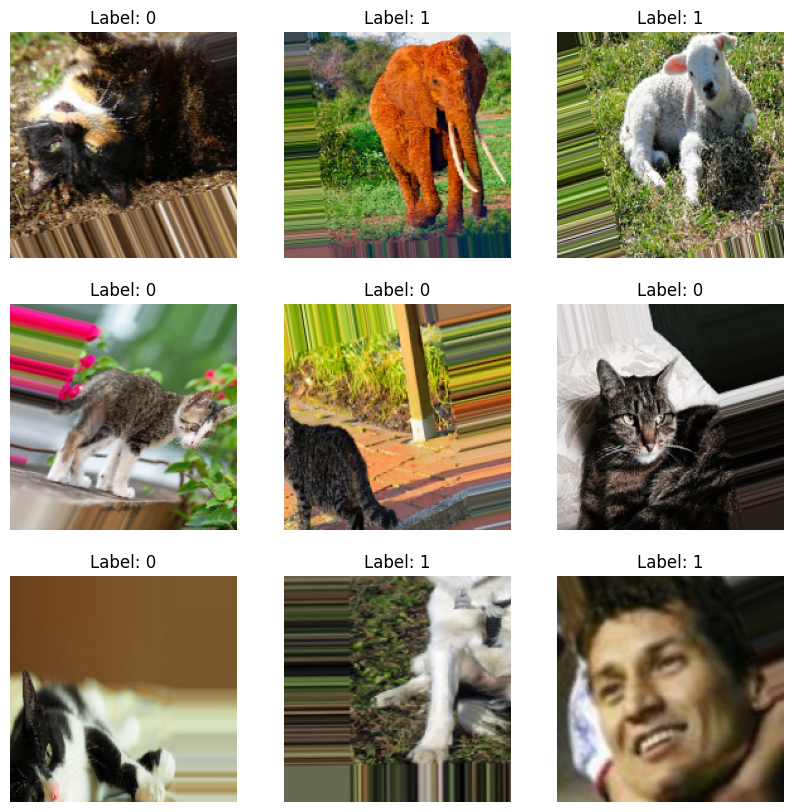

In [ ]:
print("Classnames:", train_generator.class_indices)

images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(min(9, BATCH_SIZE)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis("off")
plt.show()

In [ ]:
base_model = keras.applications.MobileNetV2(input_shape=(img_size_, img_size_, 3), include_top=False, weights="imagenet")
base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=base_model.input, outputs=x)


model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#checkpoint = callbacks.ModelCheckpoint("cat_model.keras", save_best_only=False, monitor="val_loss")

<ipython-input-7-1714a42178d1>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(input_shape=(img_size_, img_size_, 3), include_top=False, weights="imagenet")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.fit(train_generator, validation_data=val_generator, epochs=5)

model.save("cat_no-cat_model.keras", save_format="keras")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.7859 - loss: 0.4287 - val_accuracy: 0.8739 - val_loss: 0.3884
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 499ms/step - accuracy: 0.9600 - loss: 0.1161 - val_accuracy: 0.8319 - val_loss: 0.5650
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 13s 432ms/step - accuracy: 0.9245 - loss: 0.1989 - val_accuracy: 0.8992 - val_loss: 0.3354
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 13s 424ms/step - accuracy: 0.9559 - loss: 0.1099 - val_accuracy: 0.8571 - val_loss: 0.3601
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 13s 422ms/step - accuracy: 0.9740 - loss: 0.0827 - val_accuracy: 0.8824 - val_loss: 0.3748


In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - accuracy: 0.9136 - loss: 0.2296
Test Loss: 0.3695618212223053
Test Accuracy: 0.8823529481887817


In [ ]:
model = keras.models.load_model('cat_no-cat_model.keras')

img = keras.utils.load_img("drive/MyDrive/dataset_cat_no-cat/bruno/bruno_207.jpg", target_size=img_size)
plt.imshow(img)
plt.axis("off")
plt.show()


img_array = keras.utils.img_to_array(img)

img_array = img_array / 255.0


img_array = tf.expand_dims(img_array, axis=0)


predictions = model.predict(img_array)
print(predictions)

score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% Cat and {100 * score:.2f}% No-Cat.")

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/dataset_cat_no-cat/bruno/bruno_207.jpg'